In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Face Mask/data")))

['without_mask', 'with_mask']


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [ ]:
train_data_dir = '/content/drive/My Drive/Face Mask/data'
img_height = 256
img_width = 256
batch_size = 32


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 5789 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.


In [ ]:
history = classifier.fit(train_generator, validation_data = validation_generator,batch_size = batch_size,epochs=15, verbose=1)

Epoch 1/15
181/181 [==============================] - 826s 5s/step - loss: 0.3951 - accuracy: 0.8247 - precision: 0.8466 - recall: 0.8165 - auc: 0.9051 - val_loss: 0.2406 - val_accuracy: 0.9094 - val_precision: 0.8992 - val_recall: 0.9333 - val_auc: 0.9644
Epoch 2/15
181/181 [==============================] - 135s 744ms/step - loss: 0.2769 - accuracy: 0.8882 - precision: 0.8920 - recall: 0.8975 - auc: 0.9531 - val_loss: 0.2524 - val_accuracy: 0.9053 - val_precision: 0.9301 - val_recall: 0.8876 - val_auc: 0.9631
Epoch 3/15
181/181 [==============================] - 133s 733ms/step - loss: 0.2471 - accuracy: 0.8983 - precision: 0.9008 - recall: 0.9076 - auc: 0.9628 - val_loss: 0.1979 - val_accuracy: 0.9281 - val_precision: 0.9116 - val_recall: 0.9569 - val_auc: 0.9774
Epoch 4/15
181/181 [==============================] - 134s 740ms/step - loss: 0.2139 - accuracy: 0.9155 - precision: 0.9187 - recall: 0.9220 - auc: 0.9719 - val_loss: 0.2125 - val_accuracy: 0.9246 - val_precision: 0.9373 - 

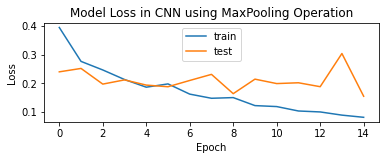

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in CNN using MaxPooling Operation')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
Xception_train_loss = history.history['loss']
Xception_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/Loss_MaxPooling.png')
pyplot.legend()
pyplot.show()

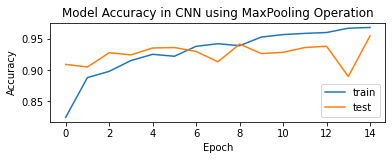

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in CNN using MaxPooling Operation')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
Xception_train_accuracy = history.history['accuracy']
Xception_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/Acc_MaxPooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
score = classifier.evaluate(validation_generator)
print(" Total: ", len(validation_generator.filenames))
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 25s 533ms/step - loss: 0.1512 - accuracy: 0.9578 - precision: 0.9681 - recall: 0.9516 - auc: 0.9868
 Total:  1446

 Loss:  0.1511969417333603 
 Accuracy:  0.957814633846283 
 Precision:  0.9680851101875305 
 Recall:  0.9516339898109436 
 F1-Score:  0.9597890606860753 
 AUC:  0.9867785573005676


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

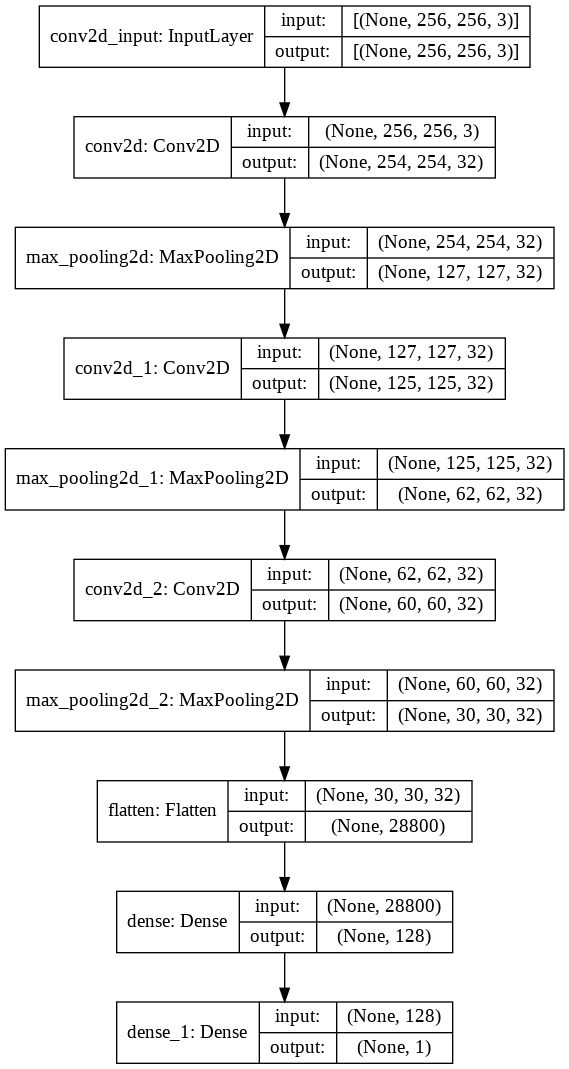

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 15
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.395091 	   0.824667 	   0.240571 	   0.909405
       2   0.276905 	   0.888236 	   0.252409 	   0.905256
       3   0.247098 	   0.898255 	   0.197868 	   0.928077
       4   0.213866 	   0.915529 	   0.212497 	   0.924620
       5   0.187116 	   0.925548 	   0.194430 	   0.935685
       6   0.198528 	   0.922439 	   0.188629 	   0.936376
       7   0.162980 	   0.938331 	   0.210510 	   0.930152
       8   0.148498 	   0.942477 	   0.231745 	   0.913555
       9   0.150883 	   0.939368 	   0.164537 	   0.941909
      10   0.122990 	   0.953187 	   0.215098 	   0.926694
      11   0.119626 	   0.957160 	   0.199690 	   0.928769
      12   0.104238 	   0.959060 	   0.202495 	   0.936376
      13   0.100932 	   0.960442 	   0.188837 	   0.938451
      14   0.089813 	   0.967352 	   0.304378 	   0.890041
      15   0.082239 	   0.968561 	   0.155537 	   0.955048


In [ ]:
classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = classifier.fit(train_generator, validation_data = validation_generator, epochs=1, batch_size=batch_size, verbose=1)

181/181 [==============================] - 137s 747ms/step - loss: 0.0825 - true_positives: 2976.0000 - true_negatives: 2637.0000 - false_positives: 89.0000 - false_negatives: 87.0000 - val_loss: 0.1300 - val_true_positives: 722.0000 - val_true_negatives: 663.0000 - val_false_positives: 18.0000 - val_false_negatives: 43.0000


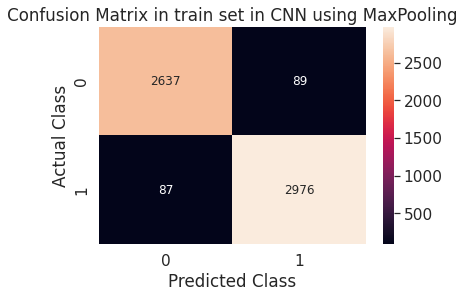

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[2637,89],
         [87,2976]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in train set in CNN using MaxPooling')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_CNN_MaxPooling_train.png')
pyplot.show()

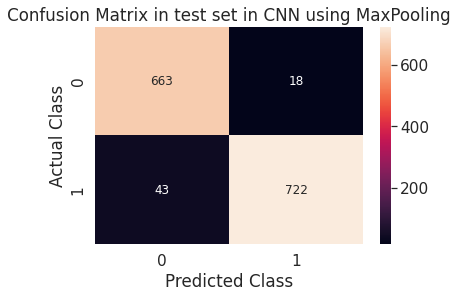

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[663,18],
         [43,722]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in test set in CNN using MaxPooling')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_CNN_MaxPooling_test.png')
pyplot.show()

with Mask


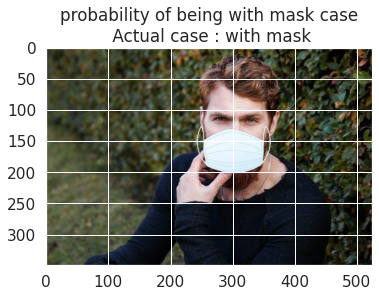

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img=mpimg.imread('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg')
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Face Mask/data/with_mask/with_mask_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices

if result[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
dic = {0:'with mask', 1:'without mask'}

plt.title(out+"\n Actual case : "+ dic.get(result[0][0])) 

imgplot = plt.imshow(img)

without Mask


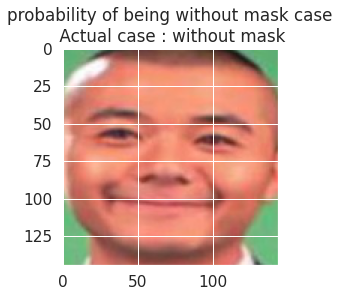

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img=mpimg.imread('/content/drive/My Drive/Face Mask/data/without_mask/without_mask_1.jpg')
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Face Mask/data/with_mask/without_mask_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices

if result[0][0] < 0.5:
  print("with Mask")
  out = ('probability of being with mask case'.format(result[0][0]))
else:
  print("without Mask")
  out = ('probability of being without mask case')
dic = {0:'with mask', 1:'without mask'}

plt.title(out+"\n Actual case : "+ dic.get(result[0][0])) 

imgplot = plt.imshow(img)